In [9]:
import os
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [10]:
os.chdir("D:/SLIIT Documents/Year 3/Semester 2/FDM/Assignment")

rawDataset=pd.read_csv("framingham.csv") 
rawDataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
rawDataset.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [12]:
rawDataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [13]:
#dropping education column as it is not helpful for the analysis
rawDataset.drop(['education'], axis=1, inplace=True)


In [14]:
rawDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [15]:
rawDataset1=rawDataset.dropna(subset=['cigsPerDay', 'BPMeds'])

In [16]:
rawDataset1.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             49
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            382
TenYearCHD           0
dtype: int64

In [17]:
#replacing total cholestorol column missing values with mean
pd.options.mode.chained_assignment = None
mean_value_totChol=rawDataset1['totChol'].mean()
rawDataset1['totChol']=rawDataset1['totChol'].fillna(mean_value_totChol)
rawDataset1.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            382
TenYearCHD           0
dtype: int64

In [18]:
#replacing BMI column missing values with mean
mean_value_bmi=rawDataset1['BMI'].mean()
rawDataset1['BMI']=rawDataset1['BMI'].fillna(mean_value_bmi)
rawDataset1.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            382
TenYearCHD           0
dtype: int64

In [19]:
#replacing Heart Rate column missing values with mean
mean_value_heartRate=rawDataset1['heartRate'].mean()
rawDataset1['heartRate']=rawDataset1['heartRate'].fillna(mean_value_heartRate)
rawDataset1.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            382
TenYearCHD           0
dtype: int64

In [20]:
#replacing glucose column missing values with mean
mean_value_glucose=rawDataset1['glucose'].mean()
rawDataset1['glucose']=rawDataset1['glucose'].fillna(mean_value_glucose)
rawDataset1.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [21]:
rawDataset1.drop_duplicates()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.935117,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [22]:
finalDataset=rawDataset1.reset_index(drop=True)


# Exploratory Data Analysis

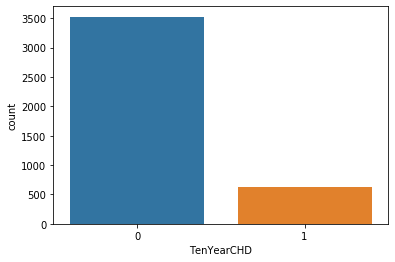

In [23]:
sns.countplot(x='TenYearCHD',data=finalDataset,)

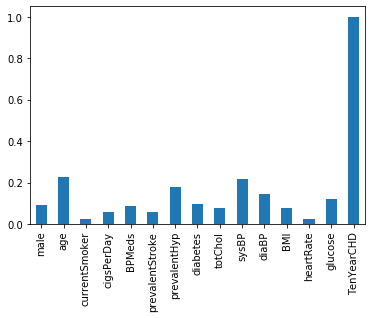

In [24]:
#plotting the correlation between target variable and other columns
Correlation=finalDataset.corrwith(finalDataset["TenYearCHD"])
Correlation.plot(kind='bar')
plt.show()

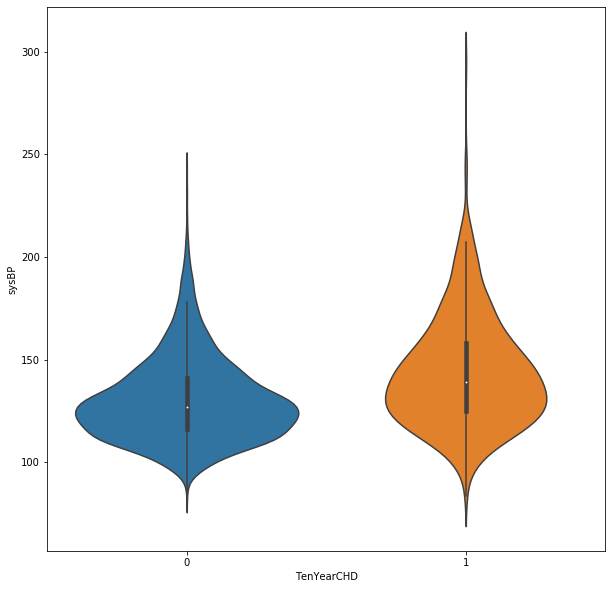

In [25]:
#since the correlation between age and sysBP is high another plot is needed for visualization
#violin plot for Target variable and systolic blood pressure
plt.figure(figsize=(10,10))
sns.violinplot(x='TenYearCHD', y='sysBP', data=finalDataset)

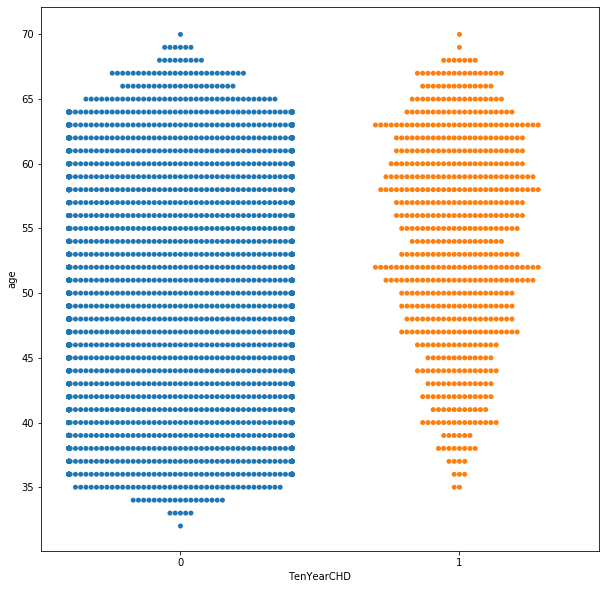

In [26]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='TenYearCHD', y='age', data=finalDataset)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002656BDB0748>,
      dtype=object)

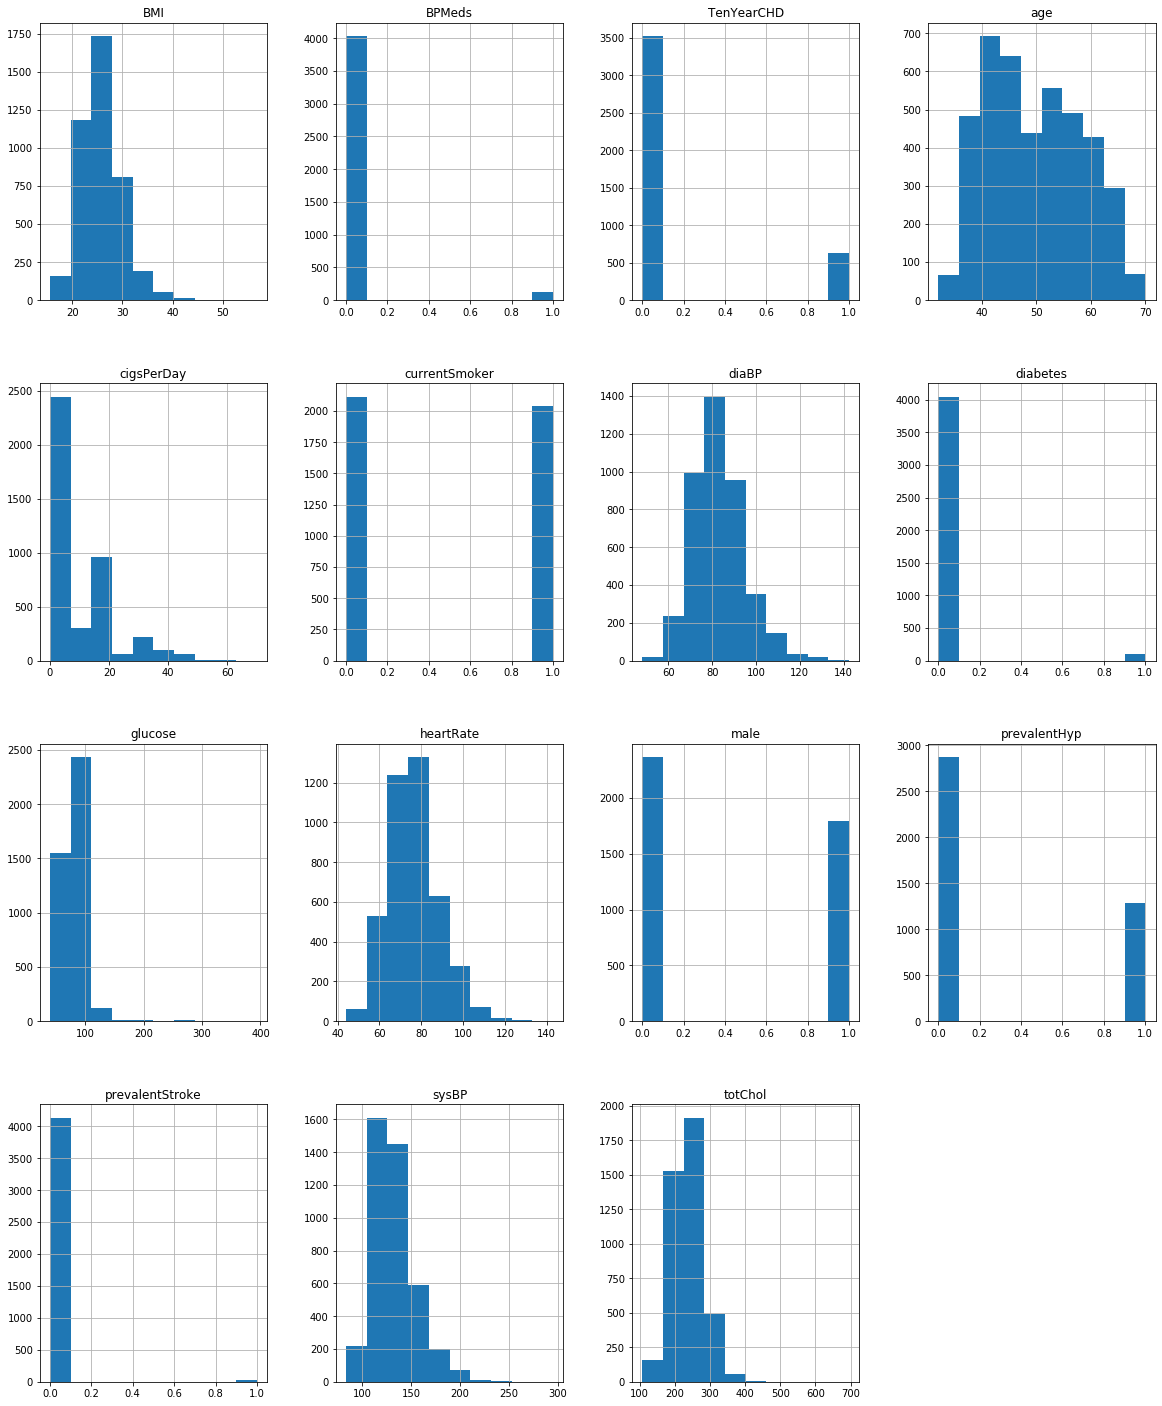

In [27]:
#Checking the distributions of all columns
figures = plt.figure(figsize = (20,25))
axis = figures.gca()
finalDataset.hist(ax = axis)

# Feature selection

In [28]:
#Feature selection is to done using AZURE ML 
#therefore preprocessed dataset is exported into a csv
finalDataset.to_csv(r'Preprocessed_framingham.csv', index = False)

![alt text](Feature_Selection.png "Title")


<p><a href="https://gallery.cortanaintelligence.com/Experiment/FDM-Feature-selection">Click here</a> to see the Azure machine learning Feature selection experiment</p>

<h6>Feature selection amounts according to pearson correlation</h6>
<ol>
    <li>age = 0.225019</li>
    <li>sysBP = 0.216287</li>
    <li>prevalentHYP = 0.176191</li>
    <li>diaBP = 0.14683</li>
    <li>glucose = 0.120305</li>
    <li>diabetes = 0.096362</li>
    <li>male(gender) = 0.092329</li>
    <li>BPMeds = 0.087417</li>
    <li>totChol = 0.077092</li>
    <li>BMI = 0.074763</li>
    <li>cigsPerDay = 0.05886</li>
    <li>prevalentStroke = 0.056258</li>
    <li>heartRate = 0.023553</li>
    <li>currentSmoker = 0.022745</li>
</ol>



In [29]:
finalFeaturedDataset = finalDataset[['age', 'sysBP','prevalentHyp','diaBP','glucose','diabetes','male','BPMeds','totChol','BMI','cigsPerDay','prevalentStroke','TenYearCHD']]

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
finalFeaturedDataset_scaled = pd.DataFrame(scaler.fit_transform(finalFeaturedDataset), columns=finalFeaturedDataset.columns)

In [45]:
#Spliiting data into testing and training
Y = finalFeaturedDataset_scaled['TenYearCHD']
X = finalFeaturedDataset_scaled.drop(['TenYearCHD'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)


<h6>Decision tree</h6>

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [48]:
y_pred_gini = clf.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with decision tree classifier: ', accuracy_score(y_test, y_pred_gini))

Model accuracy score with decision tree classifier:  0.8394230769230769


Logistic Regression 

In [50]:


from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred1 =logreg.predict(X_test)


from sklearn import metrics

print('Model accuracy score with logistic regression classifier: ', metrics.accuracy_score(y_test,y_pred1))
#print(metrics.classification_report(y_test,y_pred)),metrics.confusion_matrix(y_test,y_pred)

Model accuracy score with logistic regression classifier:  0.8432692307692308


Naive Bayes

In [51]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8105769230769231


KNeighborsClassifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

Range_k = range(1,15)
scores = {}
scores_list = []
for k in Range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred3 = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred3)
   scores_list.append(metrics.accuracy_score(y_test,y_pred3))



print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.8365384615384616


RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

y_pred4 = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

 
print("Accuracy:",accuracy_score(y_test,y_pred4))

Accuracy: 0.8355769230769231


Support vector classifier

In [54]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1, gamma=0.001, random_state=1)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test)
print("Accuracy:" ,accuracy_score(y_test, y_predict))

Accuracy: 0.8384615384615385


Two layer Artificial neural network (ANN)

In [55]:
#%pip install tensorflow
#import tensorflow as tf

#ann = tf.keras.models.Sequential()

#ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

#ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))

#ann.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))

#ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#model = ann.fit(X_train,y_train,validation_data=(X_test,y_test), batch_size = 32,epochs=100)

#y_pred = ann.predict(X_test)
#y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
#accuracy_score(y_test, y_pred)

# Logistic regression is the best algorithm to train

<p>Therefore logistic regeression is used for further activities</p>

In [64]:
#Save the logistic regression strained modelusing pickle
import pickle
with open('framingham_classifier_Logistic_regression', 'wb') as picklefile:
    pickle.dump(logreg,picklefile)

In [65]:
#To load the model
#with open('framingham_classifier_Logistic_regression', 'rb') as training_model:
    #model6 = pickle.load(training_model)